# FaceAPI練習
AzureのFaceAPIを利用した画像認識アプリの制作練習

## 必要なライブラリを取得
- requests  : URLを取得するライブラリ
- PIL       : pllow 画像を取得するライブラリ 

In [4]:
import requests
from PIL import Image

## 作成したFaceリソースのキーとエンドポイントを用意

キーを引数に入れ、assertでキーに問題がないか確認する（多分これはいらない）

In [5]:
SUBSCRIPTION_KEY = '6ff4651626dc4903b8afecd141089691'
assert SUBSCRIPTION_KEY

エンドポイントURLを引数に入れる

In [6]:
face_api_url = 'https://20210603adam.cognitiveservices.azure.com/face/v1.0/detect'

## 画像を取得する

Image.open()で画像を取得

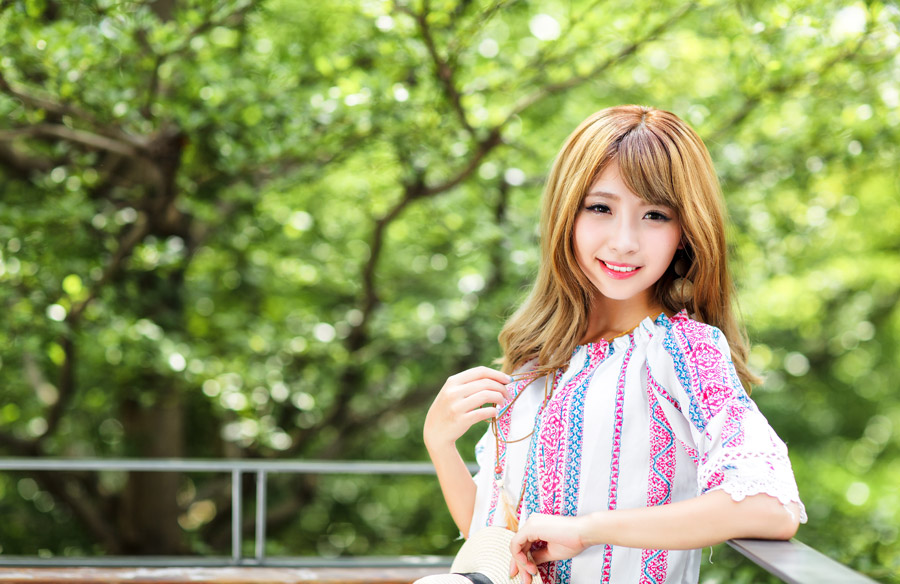

In [7]:
img = Image.open('sample_01.jpg')
img

取得した画像を with open('', 'rb') as f: でバイナリデータに変換する

In [8]:
with open('sample_01.jpg', 'rb') as f:
    binary_img = f.read()

## APIを叩く準備

### APIを叩く際に必要なパラメータを指定する  
- header : Content-Typeはおまじない  
- params : returnFaceIdだけでは位置情報だけしか取得できないので、returnFaceAttributesで様々な属性も取得する

In [9]:
headers = {
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': SUBSCRIPTION_KEY
}

params = {
    'returnFaceId': 'true',
    'returnFaceAttributes': 'age, gender, headPose, smile, facialHair, glasses, emotion, hair, makeup, occlusion, accessories, blur, exposure, noise'
}

res = requests.post(face_api_url, params=params, headers=headers, data=binary_img)

In [10]:
res

<Response [200]>

In [11]:
result = res.json()
result

[{'faceId': '733ccabe-93b1-487e-a6e4-a750eadb31c0',
  'faceRectangle': {'top': 180, 'left': 567, 'width': 115, 'height': 115},
  'faceAttributes': {'smile': 1.0,
   'headPose': {'pitch': -9.2, 'roll': 7.3, 'yaw': -2.7},
   'gender': 'female',
   'age': 20.0,
   'facialHair': {'moustache': 0.0, 'beard': 0.0, 'sideburns': 0.0},
   'glasses': 'NoGlasses',
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 1.0,
    'neutral': 0.0,
    'sadness': 0.0,
    'surprise': 0.0},
   'blur': {'blurLevel': 'medium', 'value': 0.29},
   'exposure': {'exposureLevel': 'overExposure', 'value': 0.76},
   'noise': {'noiseLevel': 'low', 'value': 0.14},
   'makeup': {'eyeMakeup': True, 'lipMakeup': True},
   'accessories': [],
   'occlusion': {'foreheadOccluded': False,
    'eyeOccluded': False,
    'mouthOccluded': False},
   'hair': {'bald': 0.05,
    'invisible': False,
    'hairColor': [{'color': 'blond', 'confidence': 0.99},
     {'color': 'brown', 'c

顔の位置情報(faceRectangle)を取得する

In [12]:
rect = result[0]['faceRectangle']
rect

{'top': 180, 'left': 567, 'width': 115, 'height': 115}

## 認証した顔の位置に矩形を表示させる

Pillowの画像に描写するライブラリを導入

In [13]:
from PIL import ImageDraw

ImageDraw.Draw()で画像に描写する準備

In [14]:
draw = ImageDraw.Draw(img)

### 画像に線を描写する

draw.line([(X座標,Y座標), (X座標,Y座標),,,], fill=色, width=太さ)

指定した座標を順番になぞっていく  
先はimgに描写されたままになるので、元の画像は再度読み込むしかない

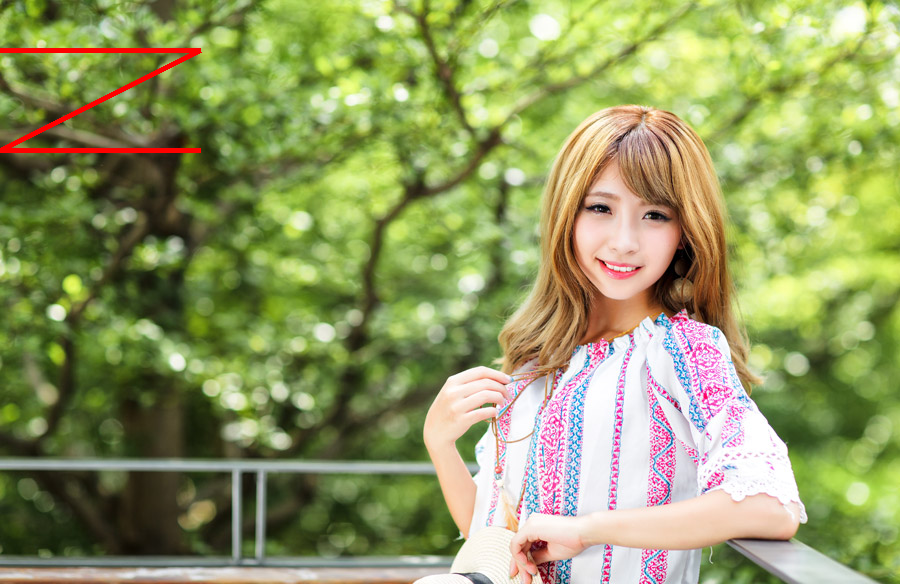

In [15]:
draw.line([(0,50), (200,50), (0,150), (200,150)], fill='red', width=5)
img

In [16]:
rect

{'top': 180, 'left': 567, 'width': 115, 'height': 115}

### 四角形(矩形)を描写させる

draw.rectangle([(左上の頂点座標),(右下の頂点座標))], fill=塗有り/無し, outline=枠の色, width=線幅)  
顔の位置情報はrectに含まれているので、左上の座標を指定した後、それぞれに高さと幅を足したものが右下の座標となる

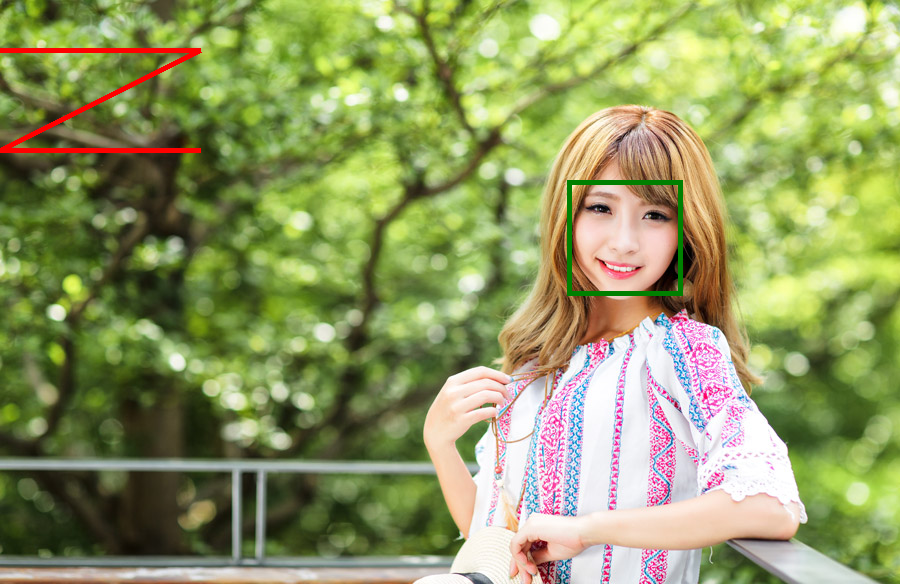

In [17]:
draw.rectangle([(rect['left'], rect['top']), (rect['left']+rect['width'], rect['top']+rect['height'])], fill=None, outline='green', width=5)
img

以上、顔認証をして矩形を描写することが出来る

## テキストの挿入
.text()でテキストを挿入することが出来る  
指定がないと座標がテキストの左上として挿入される  

下記のサンプルはanchor属性を指定することにより、  
テキストの基点を座標にずらすことが出来る

以下、公式サイトより

## 水平方向のアンカーの配置
l - 左
アンカーはテキストの左側にあります。

横書きのテキストの場合、FreeTypeのチュートリアルで示されているように、これは最初のグリフの原点となります。

m - 中央
アンカーをテキストの中央に配置します。

縦書きのテキストの場合は、テキストの特定のグリフに基づいて変更されないため、代わりにs（ベースライン）配置を使用することをお勧めします。

r - 右
アンカーをテキストの右に配置します。

横書きのテキストでは、FreeTypeのチュートリアルで示されているように、最後のグリフの高度な原点となります。

s - ベースライン (縦書きテキストのみ)
アンカーはテキストのベースライン(中央)にあります。正確な配置は、フォントによって異なります。

縦書きのテキストでは、特定のテキストのグリフに基づいて変化しないため、この配置が推奨されます（上の縦書きテキストのイメージを参照）。

## 垂直方向のアンカーの配置
a - アセンダ/トップ (横書きテキストのみ)
アンカーは、フォントで定義されているように、テキストの最初の行のアセンダーライン(上端)にあります。

詳しくはWikipediaのFont metricsを参照してください。

t - トップ (単一行テキストのみ)
アンカーはテキストの最上部にあります。

縦書きテキストの場合は、FreeTypeチュートリアルにあるように、最初のグリフの原点です。

水平方向のテキストでは、代わりに (アセンダ) 配置を使用することが推奨されます。これは、与えられたテキストの特定のグリフに基づいて変更されないからです。

m - 中央
アンカーは、テキストの垂直方向の中央に配置されます。

水平テキストの場合、最初のアセンダーラインと最後のディセンダーラインの中間点になります。

s - ベースライン (横書きテキストのみ)
アンカーはテキストの最初の行のベースライン(下)にあり、ディセンダーだけがアンカーの下に伸びます。

詳しくはWikipediaのFont metricsをご覧ください。

b - 最下部 (単一行テキストのみ)
アンカーはテキストの一番下にあります。

縦書きテキストの場合は、FreeTypeチュートリアルに示されているように、最後のグリフの高度な原点です。

横書きテキストの場合は、与えられたテキストの特定のグリフに基づいて変化しないので、代わりにd（ディセンダー）配置を使用することが推奨されます。

d - ディセンダー／ボトム（横書きテキストのみ
アンカーは、フォントで定義されているように、テキストの最終行のディセンダーライン(下端)にあります。

詳しくはWikipediaのFont metricsをご覧ください。


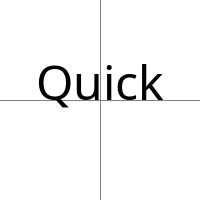

In [18]:
from PIL import Image, ImageDraw, ImageFont

font = ImageFont.truetype("Tests/fonts/NotoSans-Regular.ttf", 48)
im = Image.new("RGB", (200, 200), "white")
d = ImageDraw.Draw(im)
d.line(((0, 100), (200, 100)), "gray")
d.line(((100, 0), (100, 200)), "gray")
d.text((100, 100), "Quick", fill="black", anchor="ms", font=font)
im

## 認証された性別と年齢を表示する

リザルトのアトリビュート内にある性別と年齢を引数に入れる

In [19]:
gender = result[0]['faceAttributes']['gender']
age = str(round(result[0]['faceAttributes']['age']))

テキストを矩形の上に中央揃えで表示させる

テキストを挿入の際、フォントサイズを顔の幅の1/4とし、それ以下の場合は20で固定する


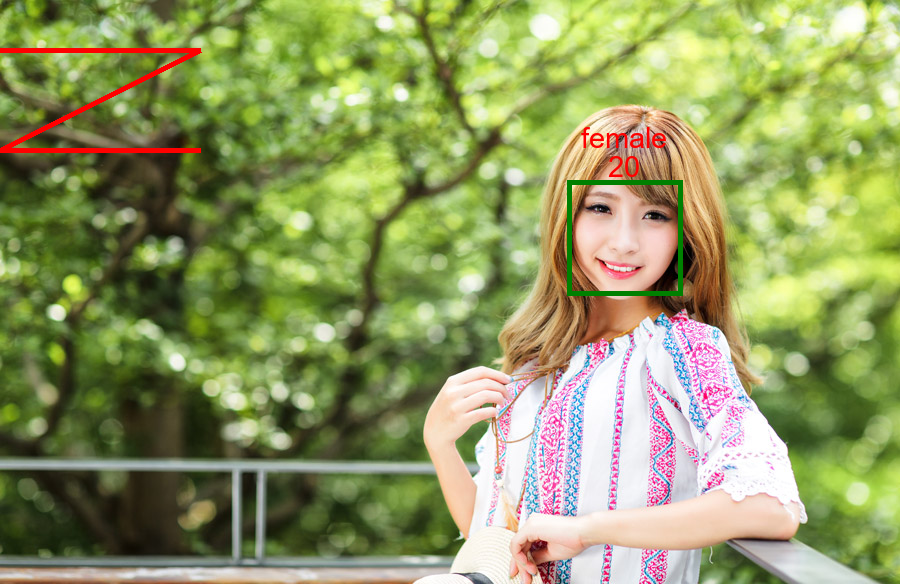

In [20]:
from PIL import Image, ImageDraw, ImageFont
if rect['width']/4 > 20:
    t_size = round(rect['width']/4)
else:
    t_size = 20
fnt = ImageFont.truetype("arial.ttf",t_size)
draw.multiline_text((rect['left']+(rect['width']/2), rect['top']-32), gender + '\n' + age, fill='red', anchor='ms', font=fnt, spacing=2, align='center')
img

## ソースまとめ

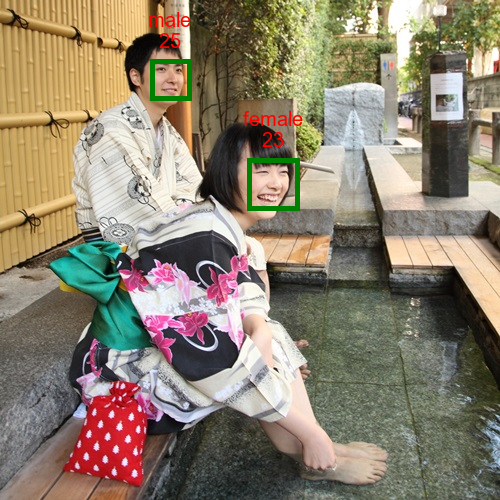

In [30]:
import requests
from PIL import Image, ImageDraw, ImageFont
import io

SUBSCRIPTION_KEY = '6ff4651626dc4903b8afecd141089691'
assert SUBSCRIPTION_KEY
face_api_url = 'https://20210603adam.cognitiveservices.azure.com/face/v1.0/detect'

img_src = 'sample_02.png'

img = Image.open(img_src)

with io.BytesIO() as output:
    img.save(output, format="JPEG")
    binary_img = output.getvalue()

headers = {
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': SUBSCRIPTION_KEY
}

params = {
    'returnFaceId': 'true',
    'returnFaceAttributes': 'age, gender, headPose, smile, facialHair, glasses, emotion, hair, makeup, occlusion, accessories, blur, exposure, noise'
}

res = requests.post(face_api_url, params=params, headers=headers, data=binary_img)
# 複数人いる場合を考慮して複数形
results = res.json()

# results内に複数情報があった場合にfor文で回す
for result in results:
    rect = result['faceRectangle']
    gender = result['faceAttributes']['gender']
    age = str(round(result['faceAttributes']['age']))

    draw = ImageDraw.Draw(img)
    draw.rectangle([(rect['left'], rect['top']), (rect['left']+rect['width'], rect['top']+rect['height'])], fill=None, outline='green', width=5)

    if rect['width']/4 > 20:
        t_size = round(rect['width']/4)
    else:
        t_size = 20
    fnt = ImageFont.truetype("arial.ttf",t_size)
    draw.multiline_text((rect['left']+(rect['width']/2), rect['top']-32), gender + '\n' + age, fill='red', anchor='ms', font=fnt, spacing=2, align='center')

img

## バイナリデータの別の取得方法
io ライブラリの io.BytesIO() を使う方法

仕組みはややこしいので、定型文として覚えておく

In [22]:
import io

In [27]:
with io.BytesIO() as output:
    img.save(output, format="JPEG")  # outputに画像をJPEGで保存する
    binary_img = output.getvalue()  # バイナリ取得

